# Explore "parts of form"
# developed by Kow Kuroda (kow.kuroda@gmail.com)
# History
2024/09/13 Created

In [284]:
#!pip install -U pyLDAvis
#!pip install -U pandas

In [285]:
## imports
import os, sys
import pprint as pp
import unicodedata

In [286]:
## 一つ上の階層のファイルを見るように設定
sys.path.append(os.path.join(os.path.dirname("__file__"), '..'))

In [287]:
## Cython module の生成 (必要に応じて)
#!python clean setup.py build_ext --inplace

In [288]:
## Cython を使うかどうか
use_Cython = False
if use_Cython:
    %load_ext Cython

In [289]:
# frequency rank range for terms to show
highest_freq_rank_for_terms_to_show = 1
lowest_freq_rank_for_terms_to_show  = 100
rank_range  = (highest_freq_rank_for_terms_to_show, lowest_freq_rank_for_terms_to_show)
print(f"rank_range: {rank_range}")

rank_range: (1, 100)


In [290]:
## term settings
term_classes        = [ 'spell', 'sound' ]
term_class          = term_classes[1]
ngram_is_inclusive  = True
inclusion_degree    = None

## doc settings
max_doc_size        = 11
min_doc_size        =  3
print(f"max_doc_size: {max_doc_size}")
print(f"min_doc_size: {min_doc_size}")

### boundary handling
mark_boundaries     = True
boundary_mark       = "#"

## term setting
term_is_skippy      = False
gap_mark            = "…"
seg_joint           = ""

### accent handling
suppress_accents    = True
accent_marks        = [ "ˈ", "ˌ" ] 
if term_class == 'sound':
    if suppress_accents:
        accent_status = "-unaccented"
    else:
        accent_stratus = "-accented"
else:
    accent_status = ""
print(f"accent_status: {accent_status}")

max_doc_size: 11
min_doc_size: 3
accent_status: -unaccented


In [291]:
## target language
## a key must be part of a file name 
target_lang_dict = {    'en_US' : 'English (US)',
                        'en_UK' : 'English (UK)',
                        'en_N_only' : 'English noun (WN)',
                        'en_V_only' : 'English verb (WN)',
                        'en_A_only' : 'English adj (WN)',
                        'en_R_only' : 'English adv (WN)',
                        'ar'    : 'Arabic',
                        'de'    : 'German',
                        'de_N_only' : 'German Nouns',
                        'de_non_N_only' : 'German Non-nouns',
                        'eo'    : 'Esperanto',
                        'es_ES' : 'Spanish (Spain)',
                        'es_MX' : 'Spanish (Mexico)',
                        'fi'    : 'Finnish',
                        'fr_FR' : 'French (France)',
                        'fr_QC' : 'French (Quebec)',
                        'is'    : 'Icelandic',
                        'ir'    : 'Irish',
                        'nl'    : 'Dutch',
                        'ro'    : 'Romanian',
                        'sw'    : 'Swahili' }
## proper language selection
target_lang_keys = [    'en_US', # 0
                        'en_UK', # 1
                        'en_N_only', # 2
                        'en_V_only', # 3
                        'en_A_only', # 4
                        'en_R_only', # 5
                        'ar', # 6
                        'de', # 7
                        'de_N_only', # 8
                        'de_non_N_only', # 9
                        'eo', 'es_ES', 'es_MX',
                        'fi', 'fr_FR', 'fr_QC',
                        'is', 'nl', 'ro', 'sw',
                        'ir' # This lacks sound
                    ]
## check
target_lang_key  = target_lang_keys[4]
print(f"target_lang_key: {target_lang_key}")
print(f"target lang: {target_lang_dict[target_lang_key]} [{target_lang_key}]")

## target_attr [effective only for Irish]
target_class = ""

#target_class = None # This causes an unrediable error
if target_lang_key == "ir":
    target_classes = [ 'adjectives', 'nouns', 'verbs' ]
    target_class = f"-{target_classes[3]}"
print(f"target_class: {target_class}")

target_lang_key: en_A_only
target lang: English adj (WN) [en_A_only]
target_class: 


In [292]:
## sampling
source_sampling          = True
source_sampling_rate     = 0.5
source_sampling_max_size = 5000
second_sampling          = False
second_sampling_rate     = 0.7

In [293]:
## set target files
import glob
data_dir1     = "data/open-dict-ipa/data1"
data_dir2     = "data/open-dict-ipa/data1a"
data_dir3     = "data/wn3"
data_dir4     = "data/irish"
target_files  = glob.glob(f"{data_dir1}/*")
target_files2 = glob.glob(f"{data_dir2}/*")
target_files.extend(target_files2)
target_files3 = glob.glob(f"{data_dir3}/*")
target_files.extend(target_files3)
target_files4 = glob.glob(f"{data_dir4}/*")
target_files.extend(target_files4)
#
target_files = sorted([ file for file in target_files if ".csv" in file ])
pp.pprint(target_files)

['data/irish/word-irish-adjectives-spell.csv',
 'data/irish/word-irish-noun-phrases-spell.csv',
 'data/irish/word-irish-nouns-spell.csv',
 'data/irish/word-irish-possessives-spell.csv',
 'data/irish/word-irish-prepositions-spell.csv',
 'data/irish/word-irish-verbs-spell.csv',
 'data/open-dict-ipa/data1/ar.csv.gz',
 'data/open-dict-ipa/data1/de.csv.gz',
 'data/open-dict-ipa/data1/en_UK.csv.gz',
 'data/open-dict-ipa/data1/en_US.csv.gz',
 'data/open-dict-ipa/data1/eo.csv.gz',
 'data/open-dict-ipa/data1/es_ES.csv.gz',
 'data/open-dict-ipa/data1/es_MX.csv.gz',
 'data/open-dict-ipa/data1/fa.csv.gz',
 'data/open-dict-ipa/data1/fi.csv.gz',
 'data/open-dict-ipa/data1/fr_FR.csv.gz',
 'data/open-dict-ipa/data1/fr_QC.csv.gz',
 'data/open-dict-ipa/data1/is.csv.gz',
 'data/open-dict-ipa/data1/ja.csv.gz',
 'data/open-dict-ipa/data1/jam.csv.gz',
 'data/open-dict-ipa/data1/ma.csv.gz',
 'data/open-dict-ipa/data1/nb.csv.gz',
 'data/open-dict-ipa/data1/nl.csv.gz',
 'data/open-dict-ipa/data1/or.csv.gz',
 '

In [294]:
## get source data from files
import pandas as pd
import gzip
#target_language_key = "en_US" # can be changed to get other languages
#if target_class != "" or target_class is not None:
if target_class != "":
    target_file = [ f for f in target_files if target_lang_key in f and target_class in f ][0]
else:
    target_file = [ f for f in target_files if target_lang_key in f ][0]
print(f"processing: {target_file}")
##
if target_lang_key == "ir":
    col_names = ['spell', 'POS']
else:
    col_names = ['spell', 'sound']

##
if target_file.endswith(".gz"):
    with gzip.open(target_file, "rt") as f:
        raw_df = pd.read_csv(f, encoding = 'utf8', header = None, names = col_names )
else:
    with open(target_file, "rt") as f:
        raw_df = pd.read_csv(f, encoding = 'utf8', header = None, names = col_names )

## normalize characters
raw_df['spell'] = raw_df['spell'].apply(lambda x: unicodedata.normalize('NFC', str(x)))

## modify sound
try:
    sounds = raw_df['sound'].apply(lambda x: x.strip('/') )
    sounds = [ x.split("/,")[0] for x in sounds ] # picks up only the first of multiple entries
    raw_df['sound'] = sounds
except (AttributeError, KeyError):
    pass
#
raw_df.sample(10)

processing: data/wn3/en_A_only.csv


,spell,sound
4162,probationary,pɹoʊˈbeɪʃəˌnɛˌɹi
4196,proportional,pɹəˈpɔɹʃənəɫ
5650,untidy,ənˈtaɪdi
389,aroused,ɝˈaʊzd
2874,inorganic,ˌɪnɔɹˈɡænɪk
5264,transitional,tɹænˈsɪʃənəɫ
1694,distraught,dɪˈstɹɔt
3686,oblique,əˈbɫik
2479,harmful,ˈhɑɹmfəɫ
2709,implausible,ˌɪmˈpɫɔzəbəɫ


In [295]:
## source sampling
len(raw_df)
if source_sampling:
	print(f"source sampling applied")
	if len(raw_df) >= source_sampling_max_size:
		raw_df = raw_df.sample(source_sampling_max_size)
	else:
		raw_df = raw_df.sample(round(len(raw_df) * source_sampling_rate))
## remove accent marking
if suppress_accents:
	try:
		raw_df['sound'] = raw_df['sound'].apply(lambda x: "".join([ y for y in list(x) if y not in accent_marks ]))
	except KeyError:
		pass
## add boudary marks
if mark_boundaries:
	raw_df['spell'] = raw_df['spell'].apply(lambda x: f"{boundary_mark}{x}{boundary_mark}")
	try:
		raw_df['sound'] = raw_df['sound'].apply(lambda x: f"{boundary_mark}{x}{boundary_mark}")
	except KeyError:
		pass
#
print(raw_df)

source sampling applied
               spell           sound
5708        #valent#        #væɫənt#
992    #chromosomal#  #kɹoʊməsoʊməɫ#
1054       #clouded#       #kɫaʊdɪd#
2286     #frightful#      #fɹaɪtfəɫ#
2282  #frictionless#    #fɹɪkʃənɫəs#
...              ...             ...
1546     #destroyed#      #dɪstɹɔɪd#
3541      #national#       #næʃənəɫ#
1787   #dumbfounded#    #dəmfaʊndɪd#
4031     #pointless#      #pɔɪntɫəs#
4229    #publicized#    #pəbɫɪsaɪzd#

[5000 rows x 2 columns]


In [296]:
## generate 1-grams for spell and sound
## spell
raw_df['sp_1gram'] = raw_df['spell'].apply(lambda x: list(str(x)))
# add column of size
raw_df['sp_size'] = raw_df['sp_1gram'].apply(lambda x: len(x))
# add column of count of '-' inside
raw_df['hyphen'] = raw_df['sp_1gram'].apply(lambda x: list(x).count("-"))
# add column of count of '.' inside
raw_df['period'] = raw_df['sp_1gram'].apply(lambda x: list(x).count("."))
## sound
# takes the first entry, removes '/' around
try:
    raw_df['sn_1gram'] = raw_df['sound'].apply(lambda x: list(x) )
except (TypeError, KeyError):
    pass
# add column of size
try:
    raw_df['sn_size'] = raw_df['sn_1gram'].apply(lambda x: len(x))
except KeyError:
    pass
## check
raw_df

,spell,sound,sp_1gram,sp_size,hyphen,period,sn_1gram,sn_size
5708,#valent#,#væɫənt#,"[#, v, a, l, e, n, t, #]",8,0,0,"[#, v, æ, ɫ, ə, n, t, #]",8
992,#chromosomal#,#kɹoʊməsoʊməɫ#,"[#, c, h, r, o, m, o, s, o, m, a, l, #]",13,0,0,"[#, k, ɹ, o, ʊ, m, ə, s, o, ʊ, m, ə, ɫ, #]",14
1054,#clouded#,#kɫaʊdɪd#,"[#, c, l, o, u, d, e, d, #]",9,0,0,"[#, k, ɫ, a, ʊ, d, ɪ, d, #]",9
2286,#frightful#,#fɹaɪtfəɫ#,"[#, f, r, i, g, h, t, f, u, l, #]",11,0,0,"[#, f, ɹ, a, ɪ, t, f, ə, ɫ, #]",10
2282,#frictionless#,#fɹɪkʃənɫəs#,"[#, f, r, i, c, t, i, o, n, l, e, s, s, #]",14,0,0,"[#, f, ɹ, ɪ, k, ʃ, ə, n, ɫ, ə, s, #]",12
...,...,...,...,...,...,...,...,...
1546,#destroyed#,#dɪstɹɔɪd#,"[#, d, e, s, t, r, o, y, e, d, #]",11,0,0,"[#, d, ɪ, s, t, ɹ, ɔ, ɪ, d, #]",10
3541,#national#,#næʃənəɫ#,"[#, n, a, t, i, o, n, a, l, #]",10,0,0,"[#, n, æ, ʃ, ə, n, ə, ɫ, #]",9
1787,#dumbfounded#,#dəmfaʊndɪd#,"[#, d, u, m, b, f, o, u, n, d, e, d, #]",13,0,0,"[#, d, ə, m, f, a, ʊ, n, d, ɪ, d, #]",12
4031,#pointless#,#pɔɪntɫəs#,"[#, p, o, i, n, t, l, e, s, s, #]",11,0,0,"[#, p, ɔ, ɪ, n, t, ɫ, ə, s, #]",10


In [297]:
## filtering raw_data by size
print(f"term_class: {term_class}")
if "spell" in term_class:
    df_filtered = raw_df[ (raw_df['sp_size'] <= max_doc_size) & (raw_df['sp_size'] >= min_doc_size) & (raw_df['hyphen'] == 0) & (raw_df['period'] == 0) ]
else:
    df_filtered = raw_df[ (raw_df['sn_size'] <= max_doc_size) & (raw_df['sn_size'] >= min_doc_size) ]
#
df_filtered

term_class: sound


,spell,sound,sp_1gram,sp_size,hyphen,period,sn_1gram,sn_size
5708,#valent#,#væɫənt#,"[#, v, a, l, e, n, t, #]",8,0,0,"[#, v, æ, ɫ, ə, n, t, #]",8
1054,#clouded#,#kɫaʊdɪd#,"[#, c, l, o, u, d, e, d, #]",9,0,0,"[#, k, ɫ, a, ʊ, d, ɪ, d, #]",9
2286,#frightful#,#fɹaɪtfəɫ#,"[#, f, r, i, g, h, t, f, u, l, #]",11,0,0,"[#, f, ɹ, a, ɪ, t, f, ə, ɫ, #]",10
4469,#revealing#,#ɹiviɫɪŋ#,"[#, r, e, v, e, a, l, i, n, g, #]",11,0,0,"[#, ɹ, i, v, i, ɫ, ɪ, ŋ, #]",9
2157,#fiduciary#,#fəduʃiɛɹi#,"[#, f, i, d, u, c, i, a, r, y, #]",11,0,0,"[#, f, ə, d, u, ʃ, i, ɛ, ɹ, i, #]",11
...,...,...,...,...,...,...,...,...
2154,#fibrous#,#faɪbɹəs#,"[#, f, i, b, r, o, u, s, #]",9,0,0,"[#, f, a, ɪ, b, ɹ, ə, s, #]",9
219,#almighty#,#ɔɫmaɪti#,"[#, a, l, m, i, g, h, t, y, #]",10,0,0,"[#, ɔ, ɫ, m, a, ɪ, t, i, #]",9
1546,#destroyed#,#dɪstɹɔɪd#,"[#, d, e, s, t, r, o, y, e, d, #]",11,0,0,"[#, d, ɪ, s, t, ɹ, ɔ, ɪ, d, #]",10
3541,#national#,#næʃənəɫ#,"[#, n, a, t, i, o, n, a, l, #]",10,0,0,"[#, n, æ, ʃ, ə, n, ə, ɫ, #]",9


In [298]:
## define df after second sampling if any
len(df_filtered)
if second_sampling:
    df = df_filtered.sample(round(len(df_filtered) * second_sampling_rate))
else:
    df = df_filtered
len(df)

3775

# Functions

In [299]:
## function for n-gram generation
def add_ngram_to_df(dfx, n_for_ngram: int, skippy: bool, prefix: str = "", seg_joint: str = "", missing_mark: str = gap_mark, max_distance = None, inclusive: bool = ngram_is_inclusive, inclusion_degree = None, use_Cython: bool = False, check: bool = False):
    """
    generic function for adding n-gram column to df with a specified n for ngram
    """
    ## variables
    source_var = f"{prefix}1gram"
    print(f"source_var: {source_var}")
    if skippy:
        target_var = f"{prefix}skippy{n_for_ngram}gram"
    else:
        target_var = f"{prefix}{n_for_ngram}gram"
    print(f"target_var: {target_var}")
    
    ##
    unigrams = dfx[source_var]
    if use_Cython:
        import cy_gen_ngrams
        if skippy:
            ngrams = [ [seg_joint.join(x) for x in cy_gen_ngrams.cy_gen_skippy_ngrams(x, n = n_for_ngram, missing_mark = missing_mark, max_distance = max_distance, check = check)] for x in unigrams ]
        else:
            ngrams = [ [seg_joint.join(x) for x in cy_gen_ngrams.cy_gen_ngrams(x, n = n_for_ngram, sep = seg_joint, check = check)] for x in unigrams ]
    else:
        import gen_ngrams
        if skippy:
            ngrams = [ gen_ngrams.gen_skippy_ngrams(x, n = n_for_ngram, sep = seg_joint, missing_mark = missing_mark, max_distance = max_distance, check = check) for x in unigrams ]
        else:
            ngrams = [ gen_ngrams.gen_ngrams(x, n = n_for_ngram, sep = seg_joint, check = check) for x in unigrams ]
    ## 包括的 n-gramの生成
    if inclusive:
        if inclusion_degree is None:
            min_size = 1
        else:
            min_size = (n_for_ngram - inclusion_degree)
        print(f"min_size: {min_size}")
        assert min_size >= 0
        if skippy and n_for_ngram > 2:
            supplement_var = f"{prefix}skippy{n_for_ngram - 1}gram"
        else:
            supplement_var = f"{prefix}{n_for_ngram - 1}gram"
        print(f"supplement_var: {supplement_var}")
        for i, g in enumerate(ngrams):
            supplement = [ x for x in list(dfx[supplement_var])[i] if len(x) >= min_size ]
            if len(supplement) > 0:
                g.extend(supplement)
    ## 変数の追加
    dfx[target_var] = ngrams
    ## check result
    print(dfx[target_var])

In [300]:
## function for extract frequent items under specifie ranking
def get_terms_by_freq_rank(dfx, rank_range: tuple, prefix: str = "", n_for_ngram: int = 2, skippy: bool = False, gap_mark: str = "…", check = False):
    "return list of most N frequent terms"
    import collections
    ## define variables
    if skippy:
        skippiness = "skippy"
    else:
        skippiness = "" 
    var_name = f'{prefix}{skippiness}{n_for_ngram}gram'
    if check:
        print(f"var_name: {var_name}")
    ## main
    G = [ ]
    [ G.extend([x for x in L if len(x.replace(gap_mark, "")) == n_for_ngram]) for L in df[var_name] ]
    if check:
        print(G)
    ## filtering data
    highest_rank = min(rank_range)
    lowest_rank  = max(rank_range)
    if check:
        print(f"highest_rank: {highest_rank}; lowest_rank: {lowest_rank}")
    R = collections.Counter(G).most_common(lowest_rank)
    R = R[(highest_rank - 1):]
    if check:
        print(R)
    ## return
    return R

## display terms with freq ranking
def show_terms_with_ranking(ranking, rank_range: tuple, n_for_ngram: int, skippy: bool, prefix: str = "", check = False):
    "display terms with a given frequency rank range"
    ## imports
    import matplotlib.pyplot as plt
    ## variables
    highest_rank = min(rank_range)
    lowest_rank  = max(rank_range)
    if skippy:
        skippiness = "skippy"
    else:
        skippiness = ""
    target_var_name = f"{prefix}{skippiness}{n_for_ngram}gram"

    ## get freq data
    ranking = sorted(ranking, key = lambda x: x[1], reverse = False)
    terms, freqs = [ ], [ ]
    for x in ranking:
        term, freq = x[0], x[1] 
        if len(term) > 0 and freq > 0:
            terms.append(term)
            freqs.append(freq)

    ## plot
    plt.figure(figsize = (5, 0.23 * len(terms)))
    plt.barh(terms, freqs)
    plt.title(f"Frequency-ranked distribution of {target_var_name} [rank {highest_rank} - rank {lowest_rank} ]")
    plt.plot()

# Spell

In [301]:
## spell 2grams
add_ngram_to_df(df, n_for_ngram = 2, prefix = "sp_", skippy = False, inclusive = True, inclusion_degree = inclusion_degree, check = False)

source_var: sp_1gram
target_var: sp_2gram
min_size: 1
supplement_var: sp_1gram
5708    [#v, va, al, le, en, nt, t#, #, v, a, l, e, n,...
1054    [#c, cl, lo, ou, ud, de, ed, d#, #, c, l, o, u...
2286    [#f, fr, ri, ig, gh, ht, tf, fu, ul, l#, #, f,...
4469    [#r, re, ev, ve, ea, al, li, in, ng, g#, #, r,...
2157    [#f, fi, id, du, uc, ci, ia, ar, ry, y#, #, f,...
                              ...                        
2154    [#f, fi, ib, br, ro, ou, us, s#, #, f, i, b, r...
219     [#a, al, lm, mi, ig, gh, ht, ty, y#, #, a, l, ...
1546    [#d, de, es, st, tr, ro, oy, ye, ed, d#, #, d,...
3541    [#n, na, at, ti, io, on, na, al, l#, #, n, a, ...
4031    [#p, po, oi, in, nt, tl, le, es, ss, s#, #, p,...
Name: sp_2gram, Length: 3775, dtype: object


/var/folders/s2/lk8hdt6j10j0xyycw1lbjsm40000gn/T/ipykernel_78267/3047574178.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx[target_var] = ngrams


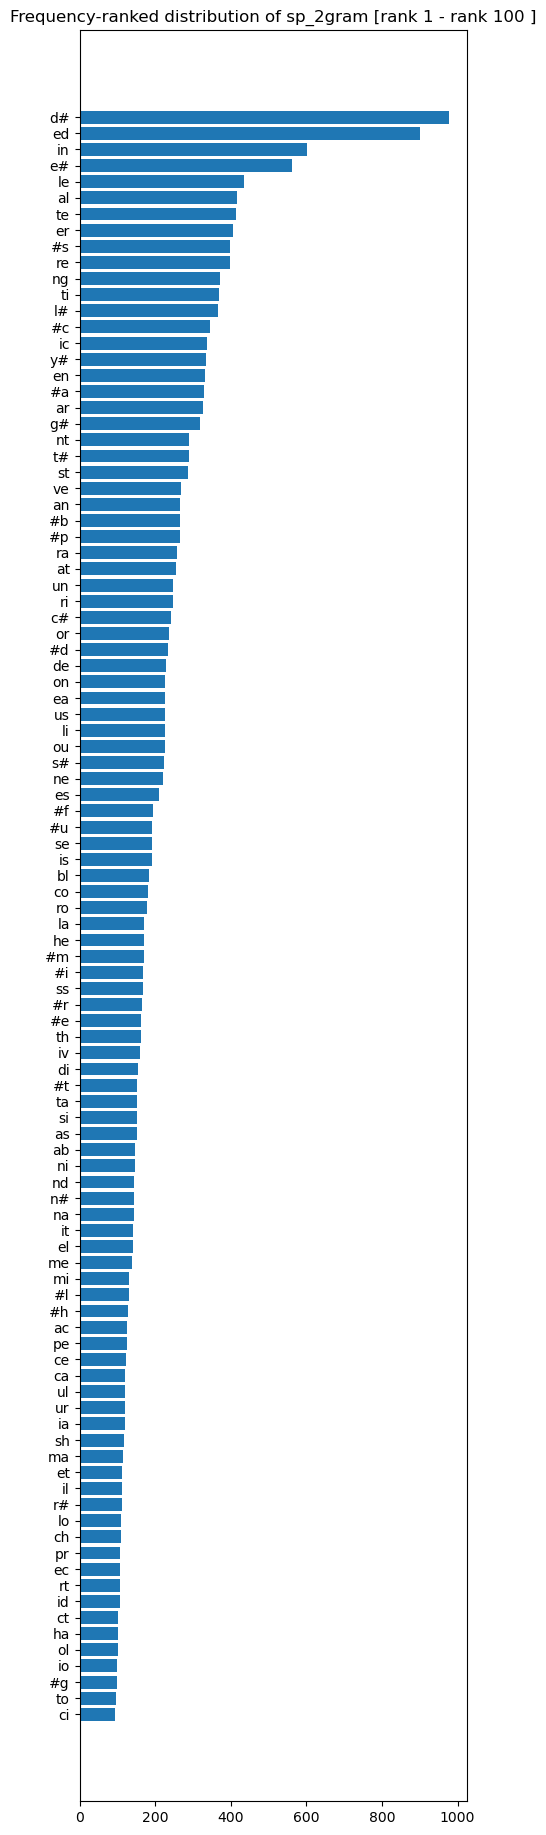

In [302]:
## frequency-ranked view
skippy = False
prefix = "sp_"
n_local = 2
#rank_range = (1,100)
#
R = get_terms_by_freq_rank(df, rank_range, prefix = prefix, n_for_ngram = n_local, skippy = skippy, check = False)
#
show_terms_with_ranking(R, rank_range, prefix = prefix, skippy = skippy, n_for_ngram = n_local, check = False)

In [303]:
## spell 3grams
add_ngram_to_df(df, n_for_ngram = 3, prefix = "sp_", skippy = False, inclusive = True, inclusion_degree = inclusion_degree, check = False)

source_var: sp_1gram
target_var: sp_3gram
min_size: 1
supplement_var: sp_2gram
5708    [#va, val, ale, len, ent, nt#, #v, va, al, le,...
1054    [#cl, clo, lou, oud, ude, ded, ed#, #c, cl, lo...
2286    [#fr, fri, rig, igh, ght, htf, tfu, ful, ul#, ...
4469    [#re, rev, eve, vea, eal, ali, lin, ing, ng#, ...
2157    [#fi, fid, idu, duc, uci, cia, iar, ary, ry#, ...
                              ...                        
2154    [#fi, fib, ibr, bro, rou, ous, us#, #f, fi, ib...
219     [#al, alm, lmi, mig, igh, ght, hty, ty#, #a, a...
1546    [#de, des, est, str, tro, roy, oye, yed, ed#, ...
3541    [#na, nat, ati, tio, ion, ona, nal, al#, #n, n...
4031    [#po, poi, oin, int, ntl, tle, les, ess, ss#, ...
Name: sp_3gram, Length: 3775, dtype: object


/var/folders/s2/lk8hdt6j10j0xyycw1lbjsm40000gn/T/ipykernel_78267/3047574178.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx[target_var] = ngrams


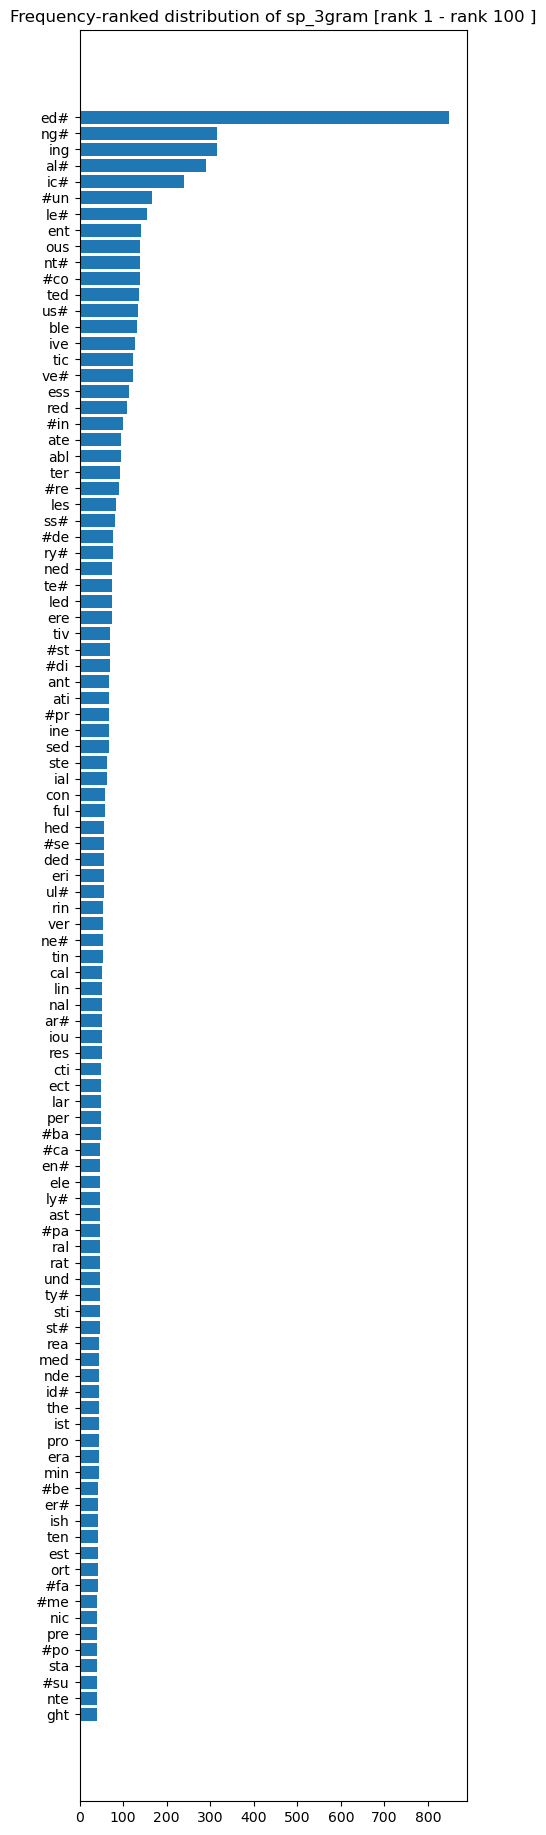

In [304]:
## frequency-ranke view
skippy = False
prefix = "sp_"
n_local = 3
#rank_range = (1,100)
#
R = get_terms_by_freq_rank(df, rank_range, prefix = prefix, n_for_ngram = n_local, skippy = skippy, check = False)
#
show_terms_with_ranking(R, rank_range, prefix = prefix, skippy = skippy, n_for_ngram = n_local, check = False)

In [305]:
## spell 4grams
add_ngram_to_df(df, n_for_ngram = 4, prefix = "sp_", skippy = False, inclusive = True, inclusion_degree = inclusion_degree, check = False)

source_var: sp_1gram
target_var: sp_4gram
min_size: 1
supplement_var: sp_3gram
5708    [#val, vale, alen, lent, ent#, #va, val, ale, ...
1054    [#clo, clou, loud, oude, uded, ded#, #cl, clo,...
2286    [#fri, frig, righ, ight, ghtf, htfu, tful, ful...
4469    [#rev, reve, evea, veal, eali, alin, ling, ing...
2157    [#fid, fidu, iduc, duci, ucia, ciar, iary, ary...
                              ...                        
2154    [#fib, fibr, ibro, brou, rous, ous#, #fi, fib,...
219     [#alm, almi, lmig, migh, ight, ghty, hty#, #al...
1546    [#des, dest, estr, stro, troy, roye, oyed, yed...
3541    [#nat, nati, atio, tion, iona, onal, nal#, #na...
4031    [#poi, poin, oint, intl, ntle, tles, less, ess...
Name: sp_4gram, Length: 3775, dtype: object


/var/folders/s2/lk8hdt6j10j0xyycw1lbjsm40000gn/T/ipykernel_78267/3047574178.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx[target_var] = ngrams


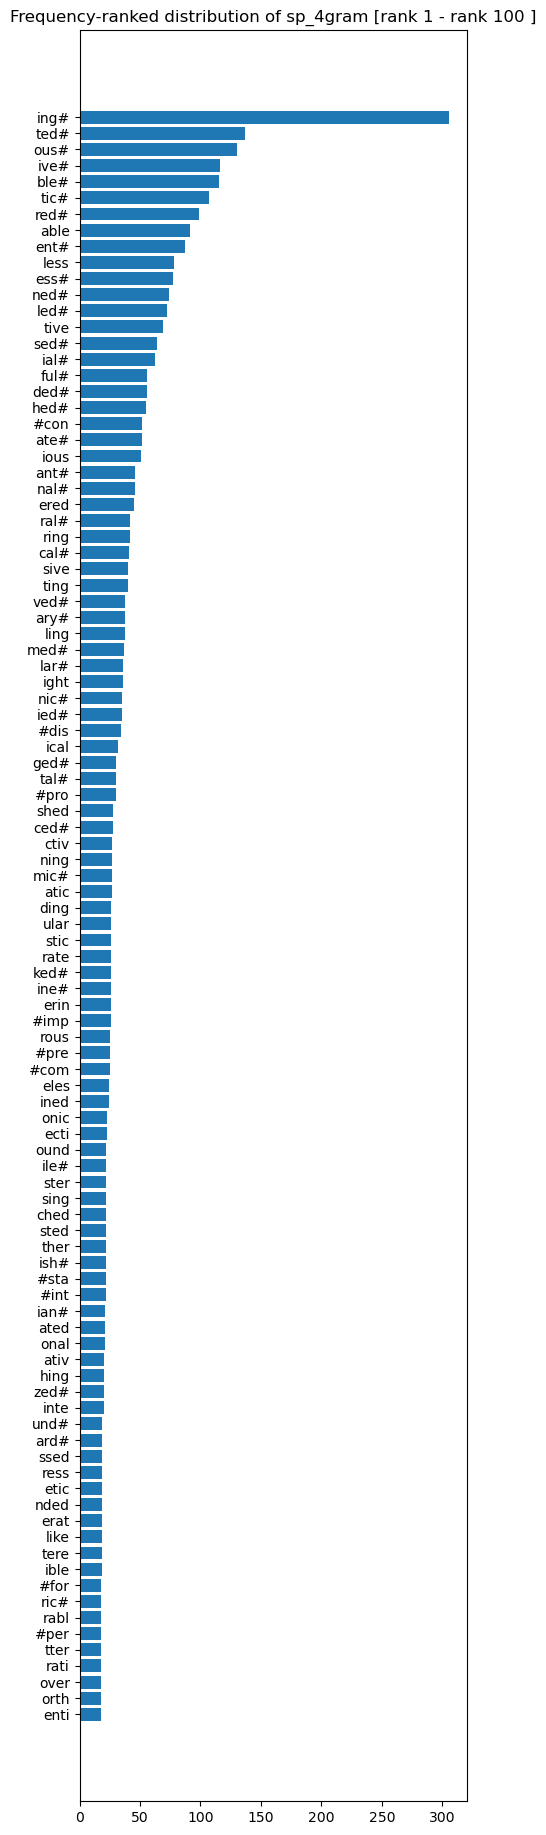

In [306]:
## frequency-ranke view
skippy = False
prefix = "sp_"
n_local = 4
#rank_range = (1,100)
#
R = get_terms_by_freq_rank(df, rank_range, prefix = prefix, n_for_ngram = n_local, skippy = skippy, check = False)
#
show_terms_with_ranking(R, rank_range, prefix = prefix, skippy = skippy, n_for_ngram = n_local, check = False)

In [307]:
## spell 5grams
add_ngram_to_df(df, n_for_ngram = 5, prefix = "sp_", skippy = False, inclusive = True, inclusion_degree = inclusion_degree, check = False)

source_var: sp_1gram
target_var: sp_5gram
min_size: 1
supplement_var: sp_4gram
5708    [#vale, valen, alent, lent#, #val, vale, alen,...
1054    [#clou, cloud, loude, ouded, uded#, #clo, clou...
2286    [#frig, frigh, right, ightf, ghtfu, htful, tfu...
4469    [#reve, revea, eveal, veali, ealin, aling, lin...
2157    [#fidu, fiduc, iduci, ducia, uciar, ciary, iar...
                              ...                        
2154    [#fibr, fibro, ibrou, brous, rous#, #fib, fibr...
219     [#almi, almig, lmigh, might, ighty, ghty#, #al...
1546    [#dest, destr, estro, stroy, troye, royed, oye...
3541    [#nati, natio, ation, tiona, ional, onal#, #na...
4031    [#poin, point, ointl, intle, ntles, tless, les...
Name: sp_5gram, Length: 3775, dtype: object


/var/folders/s2/lk8hdt6j10j0xyycw1lbjsm40000gn/T/ipykernel_78267/3047574178.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx[target_var] = ngrams


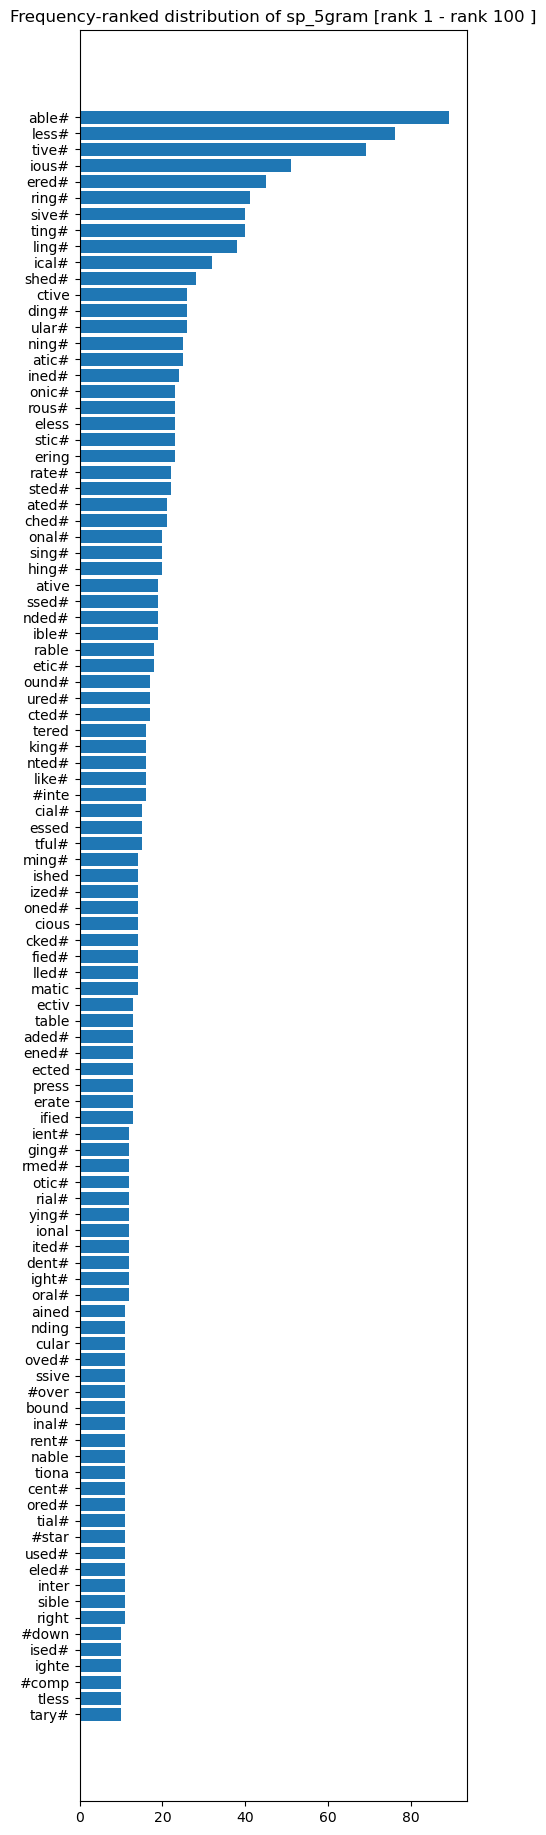

In [308]:
## frequency-ranke view
skippy = False
prefix = "sp_"
n_local = 5
#rank_range = (1,100)
#
R = get_terms_by_freq_rank(df, rank_range, prefix = prefix, n_for_ngram = n_local, skippy = skippy, check = False)
#
show_terms_with_ranking(R, rank_range, prefix = prefix, skippy = skippy, n_for_ngram = n_local, check = False)

In [309]:
## spell skippy 2grams
add_ngram_to_df(df, n_for_ngram = 2, prefix = "sp_", skippy = True, inclusive = ngram_is_inclusive, inclusion_degree = inclusion_degree, check = False)

source_var: sp_1gram
target_var: sp_skippy2gram
min_size: 1
supplement_var: sp_1gram
5708    [#v, #…a, #…l, #…e, #…n, #…t, #…#, va, v…l, v…...
1054    [#c, #…l, #…o, #…u, #…d, #…e, #…d, #…#, cl, c…...
2286    [#f, #…r, #…i, #…g, #…h, #…t, #…f, #…u, #…l, #...
4469    [#r, #…e, #…v, #…e, #…a, #…l, #…i, #…n, #…g, #...
2157    [#f, #…i, #…d, #…u, #…c, #…i, #…a, #…r, #…y, #...
                              ...                        
2154    [#f, #…i, #…b, #…r, #…o, #…u, #…s, #…#, fi, f…...
219     [#a, #…l, #…m, #…i, #…g, #…h, #…t, #…y, #…#, a...
1546    [#d, #…e, #…s, #…t, #…r, #…o, #…y, #…e, #…d, #...
3541    [#n, #…a, #…t, #…i, #…o, #…n, #…a, #…l, #…#, n...
4031    [#p, #…o, #…i, #…n, #…t, #…l, #…e, #…s, #…s, #...
Name: sp_skippy2gram, Length: 3775, dtype: object


/var/folders/s2/lk8hdt6j10j0xyycw1lbjsm40000gn/T/ipykernel_78267/3047574178.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx[target_var] = ngrams


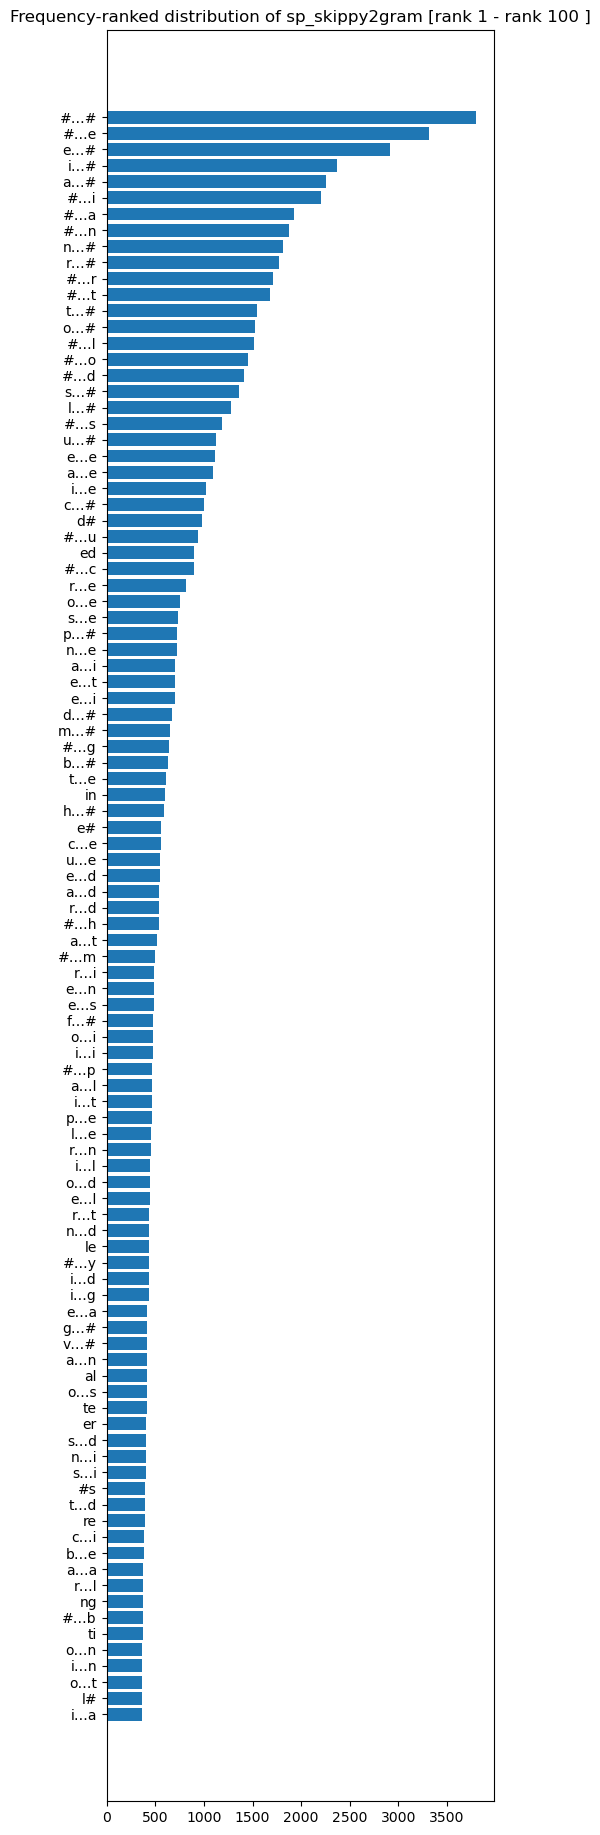

In [310]:
## frequency-ranked view
skippy = True
prefix = "sp_"
n_local = 2
#rank_range = (1,100)
#
R = get_terms_by_freq_rank(df, rank_range, prefix = prefix, n_for_ngram = n_local, skippy = skippy, check = False)
#
show_terms_with_ranking(R, rank_range, prefix = prefix, skippy = skippy, n_for_ngram = n_local, check = False)

In [311]:
## spell skippy 3grams
add_ngram_to_df(df, n_for_ngram = 3, prefix = "sp_", skippy = True, inclusive = ngram_is_inclusive, inclusion_degree = inclusion_degree, check = False)

source_var: sp_1gram
target_var: sp_skippy3gram
min_size: 1
supplement_var: sp_skippy2gram
5708    [#va, #v…l, #v…e, #v…n, #v…t, #v…#, #…al, #…a…...
1054    [#cl, #c…o, #c…u, #c…d, #c…e, #c…d, #c…#, #…lo...
2286    [#fr, #f…i, #f…g, #f…h, #f…t, #f…f, #f…u, #f…l...
4469    [#re, #r…v, #r…e, #r…a, #r…l, #r…i, #r…n, #r…g...
2157    [#fi, #f…d, #f…u, #f…c, #f…i, #f…a, #f…r, #f…y...
                              ...                        
2154    [#fi, #f…b, #f…r, #f…o, #f…u, #f…s, #f…#, #…ib...
219     [#al, #a…m, #a…i, #a…g, #a…h, #a…t, #a…y, #a…#...
1546    [#de, #d…s, #d…t, #d…r, #d…o, #d…y, #d…e, #d…d...
3541    [#na, #n…t, #n…i, #n…o, #n…n, #n…a, #n…l, #n…#...
4031    [#po, #p…i, #p…n, #p…t, #p…l, #p…e, #p…s, #p…s...
Name: sp_skippy3gram, Length: 3775, dtype: object


/var/folders/s2/lk8hdt6j10j0xyycw1lbjsm40000gn/T/ipykernel_78267/3047574178.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx[target_var] = ngrams


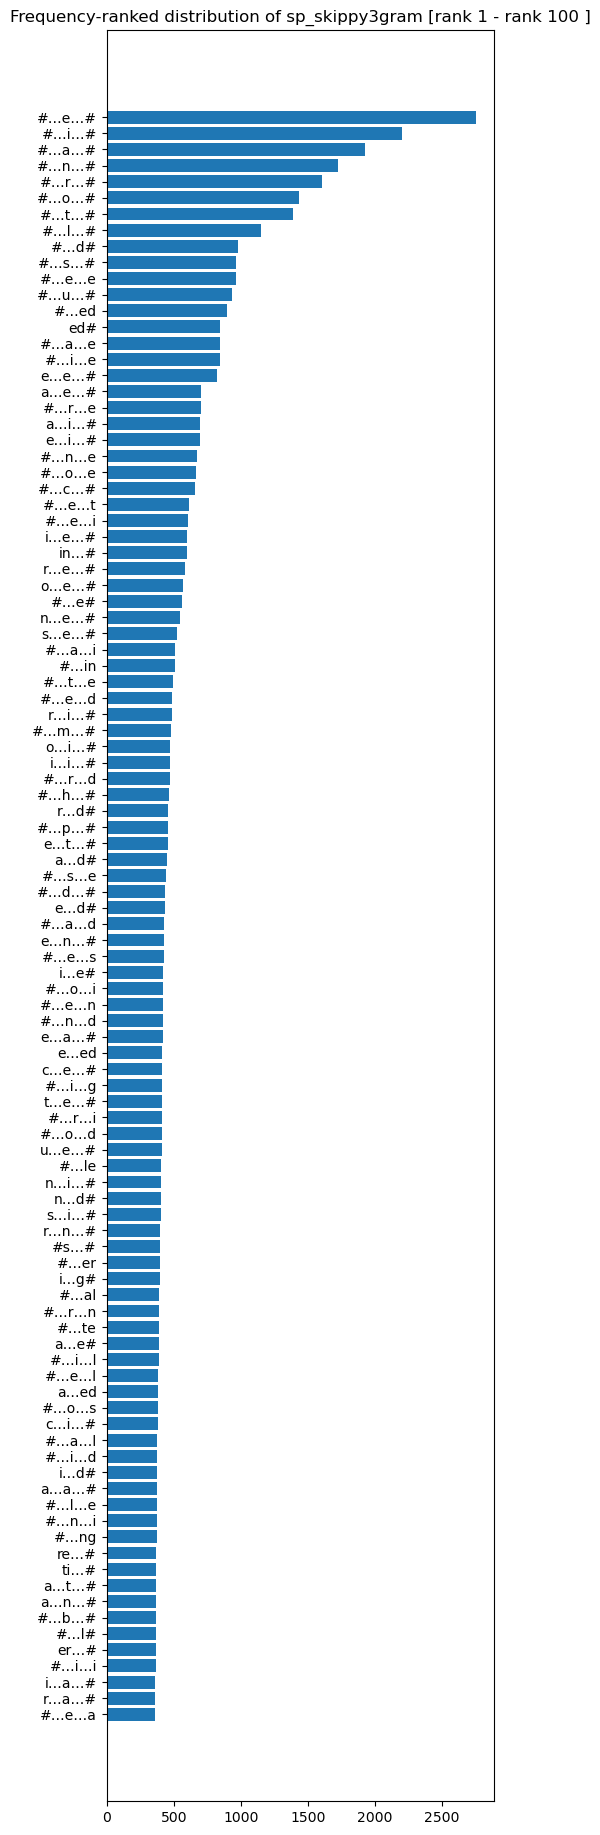

In [312]:
## frequency-ranked view
skippy = True
prefix = "sp_"
n_local = 3
#rank_range = (1,100)
#
R = get_terms_by_freq_rank(df, rank_range, prefix = prefix, n_for_ngram = n_local, skippy = skippy, check = False)
#
show_terms_with_ranking(R, rank_range, prefix = prefix, skippy = skippy, n_for_ngram = n_local, check = False)

In [313]:
## spell skippy 4grams
add_ngram_to_df(df, n_for_ngram = 4, prefix = "sp_", skippy = True, inclusive = ngram_is_inclusive, inclusion_degree = inclusion_degree, check = False)

source_var: sp_1gram
target_var: sp_skippy4gram
min_size: 1
supplement_var: sp_skippy3gram
5708    [#val, #va…e, #va…n, #va…t, #va…#, #v…le, #v…l...
1054    [#clo, #cl…u, #cl…d, #cl…e, #cl…d, #cl…#, #c…o...
2286    [#fri, #fr…g, #fr…h, #fr…t, #fr…f, #fr…u, #fr…...
4469    [#rev, #re…e, #re…a, #re…l, #re…i, #re…n, #re…...
2157    [#fid, #fi…u, #fi…c, #fi…i, #fi…a, #fi…r, #fi…...
                              ...                        
2154    [#fib, #fi…r, #fi…o, #fi…u, #fi…s, #fi…#, #f…b...
219     [#alm, #al…i, #al…g, #al…h, #al…t, #al…y, #al…...
1546    [#des, #de…t, #de…r, #de…o, #de…y, #de…e, #de…...
3541    [#nat, #na…i, #na…o, #na…n, #na…a, #na…l, #na…...
4031    [#poi, #po…n, #po…t, #po…l, #po…e, #po…s, #po…...
Name: sp_skippy4gram, Length: 3775, dtype: object


/var/folders/s2/lk8hdt6j10j0xyycw1lbjsm40000gn/T/ipykernel_78267/3047574178.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx[target_var] = ngrams


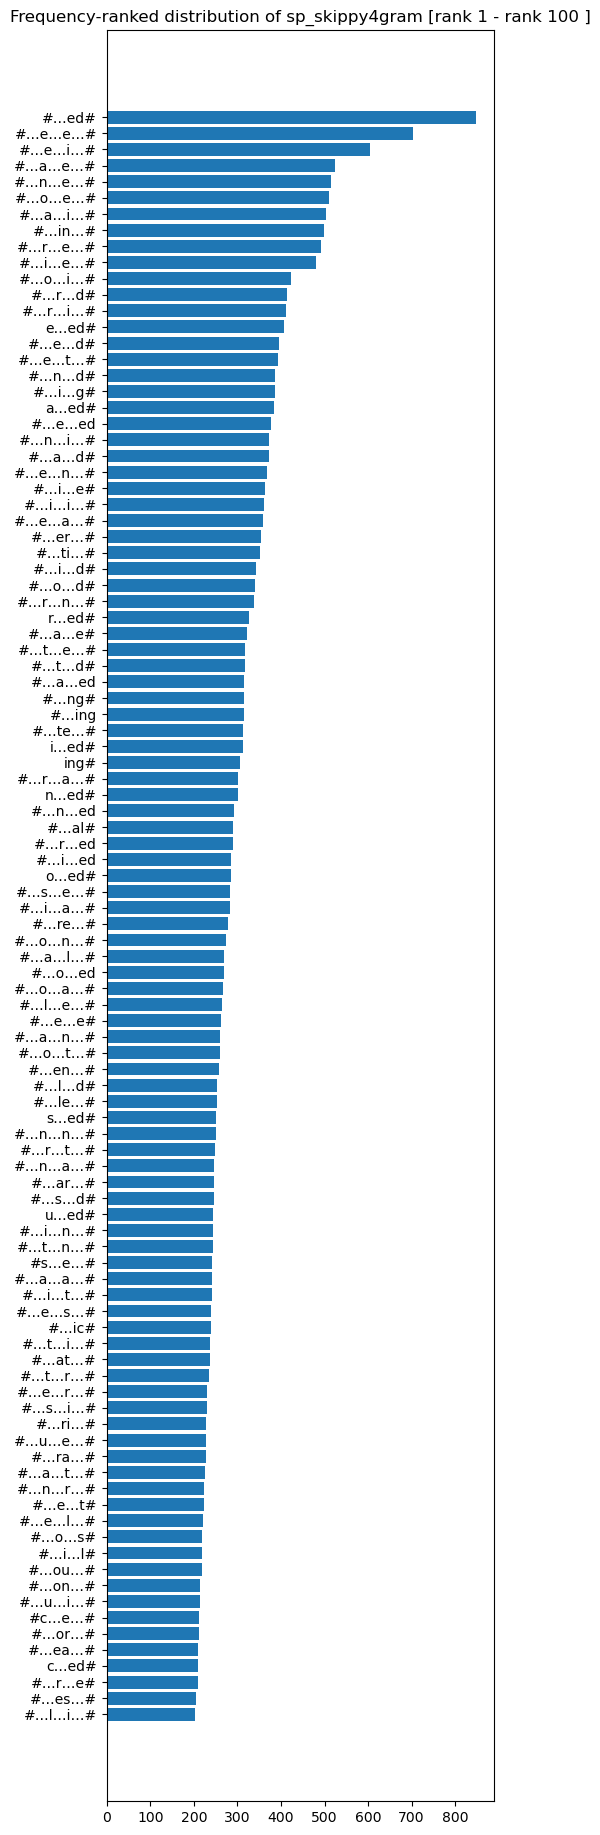

In [314]:
## frequency-ranked view
skippy = True
prefix = "sp_"
n_local = 4
#rank_range = (1,100)
#
R = get_terms_by_freq_rank(df, rank_range, prefix = prefix, n_for_ngram = n_local, skippy = skippy, check = False)
#
show_terms_with_ranking(R, rank_range, prefix = prefix, skippy = skippy, n_for_ngram = n_local, check = False)

In [315]:
## spell skippy 5grams
add_ngram_to_df(df, n_for_ngram = 5, prefix = "sp_", skippy = True, inclusive = ngram_is_inclusive, inclusion_degree = inclusion_degree, check = False)

source_var: sp_1gram
target_var: sp_skippy5gram
min_size: 1
supplement_var: sp_skippy4gram
5708    [#vale, #val…n, #val…t, #val…#, #va…en, #va…e…...
1054    [#clou, #clo…d, #clo…e, #clo…d, #clo…#, #cl…ud...
2286    [#frig, #fri…h, #fri…t, #fri…f, #fri…u, #fri…l...
4469    [#reve, #rev…a, #rev…l, #rev…i, #rev…n, #rev…g...
2157    [#fidu, #fid…c, #fid…i, #fid…a, #fid…r, #fid…y...
                              ...                        
2154    [#fibr, #fib…o, #fib…u, #fib…s, #fib…#, #fi…ro...
219     [#almi, #alm…g, #alm…h, #alm…t, #alm…y, #alm…#...
1546    [#dest, #des…r, #des…o, #des…y, #des…e, #des…d...
3541    [#nati, #nat…o, #nat…n, #nat…a, #nat…l, #nat…#...
4031    [#poin, #poi…t, #poi…l, #poi…e, #poi…s, #poi…s...
Name: sp_skippy5gram, Length: 3775, dtype: object


/var/folders/s2/lk8hdt6j10j0xyycw1lbjsm40000gn/T/ipykernel_78267/3047574178.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx[target_var] = ngrams


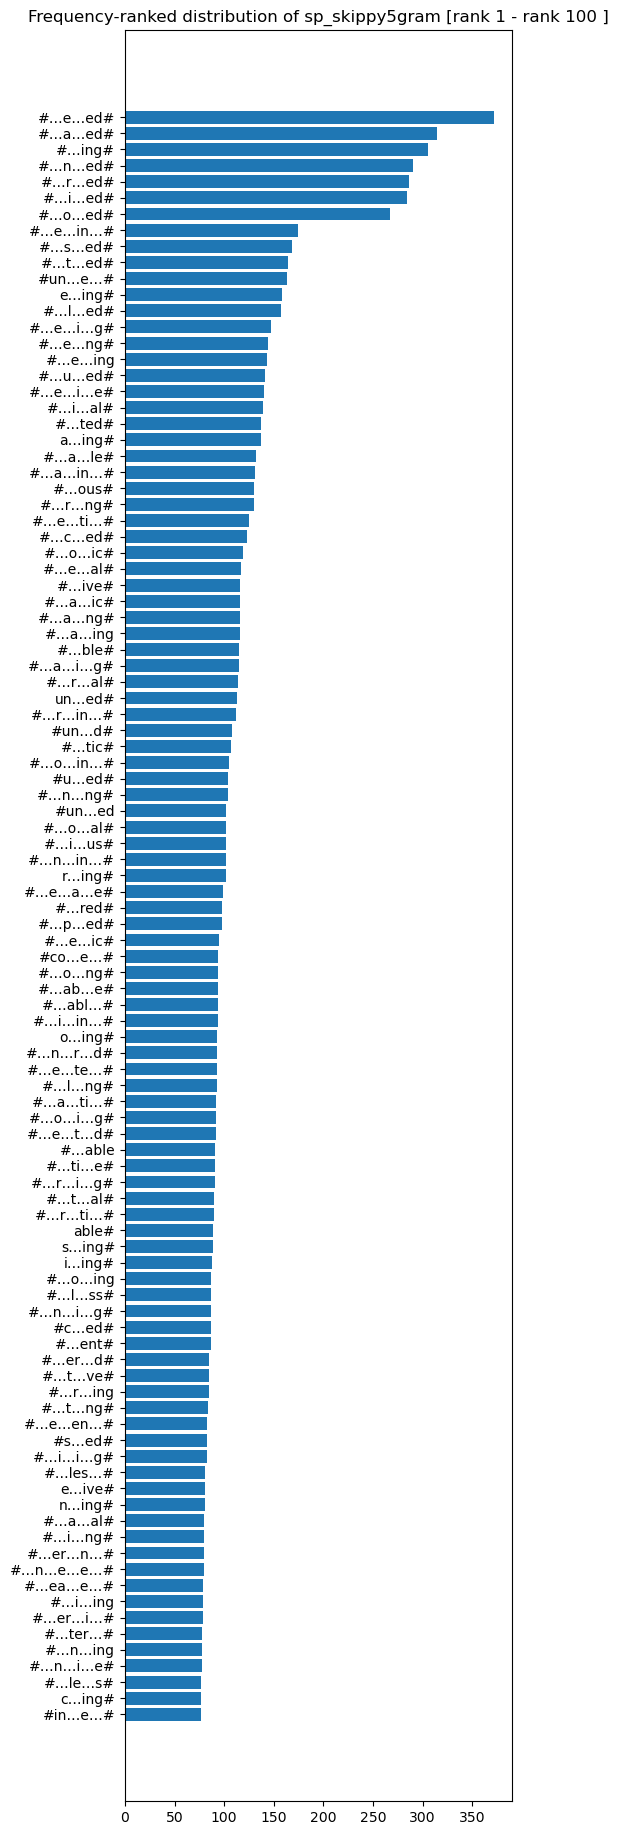

In [316]:
## frequency-ranked view
skippy = True
prefix = "sp_"
n_local = 5
#rank_range = (1,100)
#
R = get_terms_by_freq_rank(df, rank_range, prefix = prefix, n_for_ngram = n_local, skippy = skippy, check = False)
#
show_terms_with_ranking(R, rank_range, prefix = prefix, skippy = skippy, n_for_ngram = n_local, check = False)

# Sound

In [317]:
## sound 2grams
add_ngram_to_df(df, n_for_ngram = 2, skippy = False, prefix = "sn_", inclusive = True, inclusion_degree = inclusion_degree, check = False)

source_var: sn_1gram
target_var: sn_2gram
min_size: 1
supplement_var: sn_1gram
5708    [#v, væ, æɫ, ɫə, ən, nt, t#, #, v, æ, ɫ, ə, n,...
1054    [#k, kɫ, ɫa, aʊ, ʊd, dɪ, ɪd, d#, #, k, ɫ, a, ʊ...
2286    [#f, fɹ, ɹa, aɪ, ɪt, tf, fə, əɫ, ɫ#, #, f, ɹ, ...
4469    [#ɹ, ɹi, iv, vi, iɫ, ɫɪ, ɪŋ, ŋ#, #, ɹ, i, v, i...
2157    [#f, fə, əd, du, uʃ, ʃi, iɛ, ɛɹ, ɹi, i#, #, f,...
                              ...                        
2154    [#f, fa, aɪ, ɪb, bɹ, ɹə, əs, s#, #, f, a, ɪ, b...
219     [#ɔ, ɔɫ, ɫm, ma, aɪ, ɪt, ti, i#, #, ɔ, ɫ, m, a...
1546    [#d, dɪ, ɪs, st, tɹ, ɹɔ, ɔɪ, ɪd, d#, #, d, ɪ, ...
3541    [#n, næ, æʃ, ʃə, ən, nə, əɫ, ɫ#, #, n, æ, ʃ, ə...
4031    [#p, pɔ, ɔɪ, ɪn, nt, tɫ, ɫə, əs, s#, #, p, ɔ, ...
Name: sn_2gram, Length: 3775, dtype: object


/var/folders/s2/lk8hdt6j10j0xyycw1lbjsm40000gn/T/ipykernel_78267/3047574178.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx[target_var] = ngrams


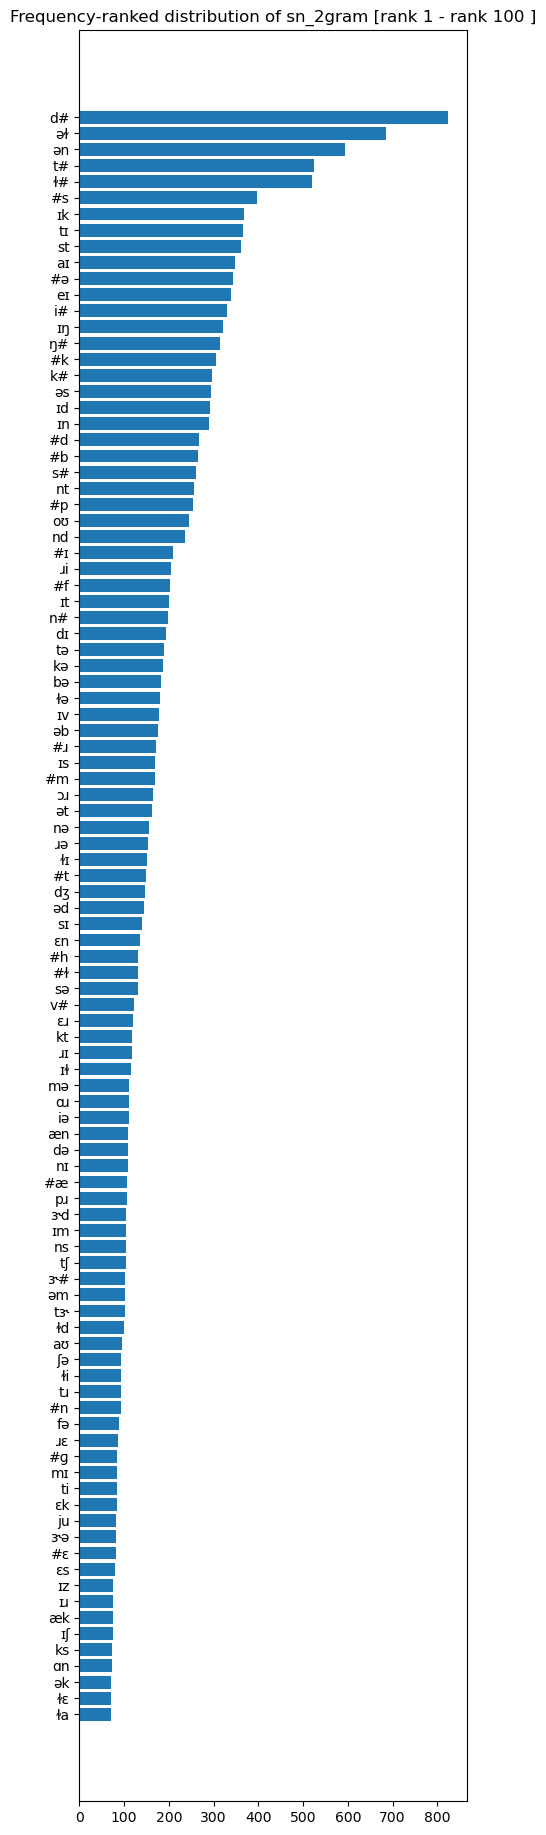

In [318]:
## frequency-ranked view
skippy = False
prefix = "sn_"
n_local = 2
#rank_range = (1,100)
#
R = get_terms_by_freq_rank(df, rank_range, prefix = prefix, n_for_ngram = n_local, skippy = skippy, check = False)
#
show_terms_with_ranking(R, rank_range, prefix = prefix, skippy = skippy, n_for_ngram = n_local, check = False)

In [319]:
## sound 3grams
add_ngram_to_df(df, n_for_ngram = 3, skippy = False, prefix = "sn_", inclusive = True, inclusion_degree = inclusion_degree, check = False)

source_var: sn_1gram
target_var: sn_3gram
min_size: 1
supplement_var: sn_2gram
5708    [#væ, væɫ, æɫə, ɫən, ənt, nt#, #v, væ, æɫ, ɫə,...
1054    [#kɫ, kɫa, ɫaʊ, aʊd, ʊdɪ, dɪd, ɪd#, #k, kɫ, ɫa...
2286    [#fɹ, fɹa, ɹaɪ, aɪt, ɪtf, tfə, fəɫ, əɫ#, #f, f...
4469    [#ɹi, ɹiv, ivi, viɫ, iɫɪ, ɫɪŋ, ɪŋ#, #ɹ, ɹi, iv...
2157    [#fə, fəd, ədu, duʃ, uʃi, ʃiɛ, iɛɹ, ɛɹi, ɹi#, ...
                              ...                        
2154    [#fa, faɪ, aɪb, ɪbɹ, bɹə, ɹəs, əs#, #f, fa, aɪ...
219     [#ɔɫ, ɔɫm, ɫma, maɪ, aɪt, ɪti, ti#, #ɔ, ɔɫ, ɫm...
1546    [#dɪ, dɪs, ɪst, stɹ, tɹɔ, ɹɔɪ, ɔɪd, ɪd#, #d, d...
3541    [#næ, næʃ, æʃə, ʃən, ənə, nəɫ, əɫ#, #n, næ, æʃ...
4031    [#pɔ, pɔɪ, ɔɪn, ɪnt, ntɫ, tɫə, ɫəs, əs#, #p, p...
Name: sn_3gram, Length: 3775, dtype: object


/var/folders/s2/lk8hdt6j10j0xyycw1lbjsm40000gn/T/ipykernel_78267/3047574178.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx[target_var] = ngrams


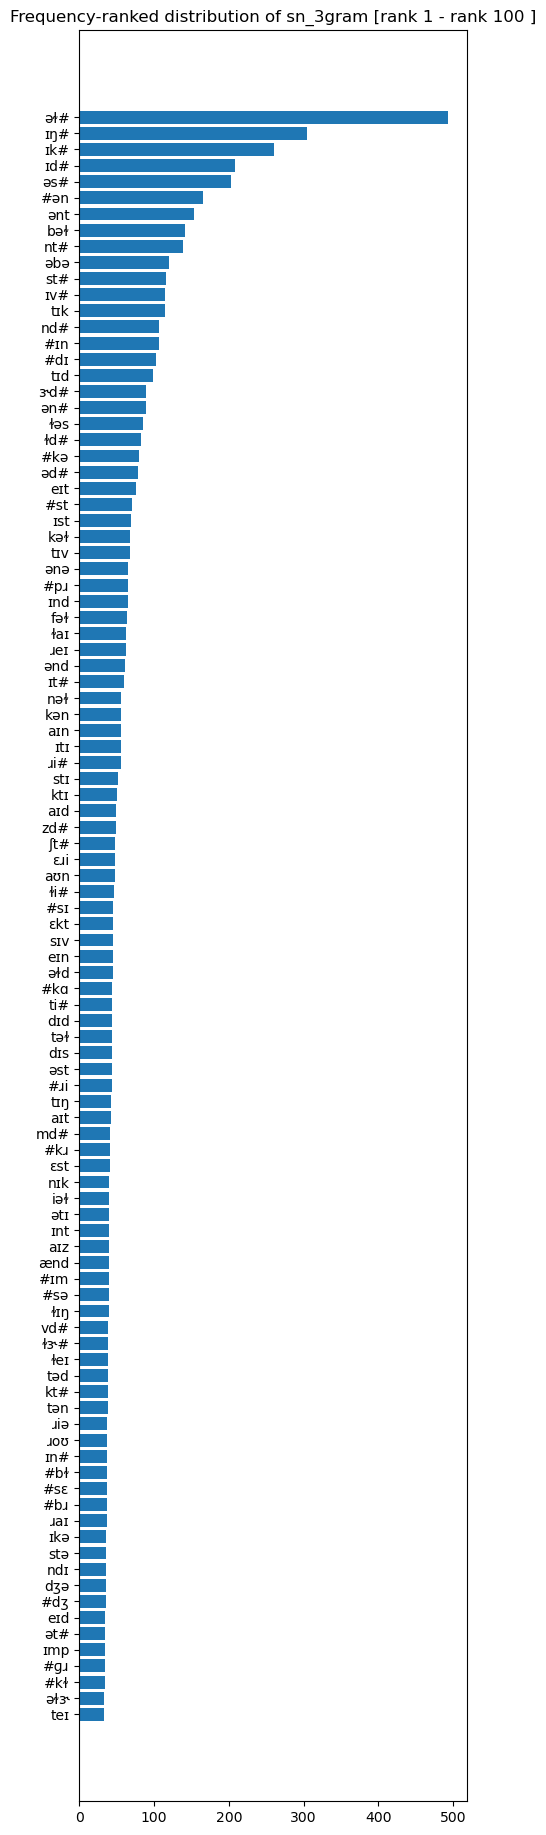

In [320]:
## frequency-ranked view
skippy = False
prefix = "sn_"
n_local = 3
#rank_range = (1,100)
#
R = get_terms_by_freq_rank(df, rank_range, prefix = prefix, n_for_ngram = n_local, skippy = skippy, check = False)
#
show_terms_with_ranking(R, rank_range, prefix = prefix, skippy = skippy, n_for_ngram = n_local, check = False)

In [321]:
## sound 4grams
add_ngram_to_df(df, n_for_ngram = 4, skippy = False, prefix = "sn_", inclusive = True, inclusion_degree = inclusion_degree, check = False)

source_var: sn_1gram
target_var: sn_4gram
min_size: 1
supplement_var: sn_3gram
5708    [#væɫ, væɫə, æɫən, ɫənt, ənt#, #væ, væɫ, æɫə, ...
1054    [#kɫa, kɫaʊ, ɫaʊd, aʊdɪ, ʊdɪd, dɪd#, #kɫ, kɫa,...
2286    [#fɹa, fɹaɪ, ɹaɪt, aɪtf, ɪtfə, tfəɫ, fəɫ#, #fɹ...
4469    [#ɹiv, ɹivi, iviɫ, viɫɪ, iɫɪŋ, ɫɪŋ#, #ɹi, ɹiv,...
2157    [#fəd, fədu, əduʃ, duʃi, uʃiɛ, ʃiɛɹ, iɛɹi, ɛɹi...
                              ...                        
2154    [#faɪ, faɪb, aɪbɹ, ɪbɹə, bɹəs, ɹəs#, #fa, faɪ,...
219     [#ɔɫm, ɔɫma, ɫmaɪ, maɪt, aɪti, ɪti#, #ɔɫ, ɔɫm,...
1546    [#dɪs, dɪst, ɪstɹ, stɹɔ, tɹɔɪ, ɹɔɪd, ɔɪd#, #dɪ...
3541    [#næʃ, næʃə, æʃən, ʃənə, ənəɫ, nəɫ#, #næ, næʃ,...
4031    [#pɔɪ, pɔɪn, ɔɪnt, ɪntɫ, ntɫə, tɫəs, ɫəs#, #pɔ...
Name: sn_4gram, Length: 3775, dtype: object


/var/folders/s2/lk8hdt6j10j0xyycw1lbjsm40000gn/T/ipykernel_78267/3047574178.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx[target_var] = ngrams


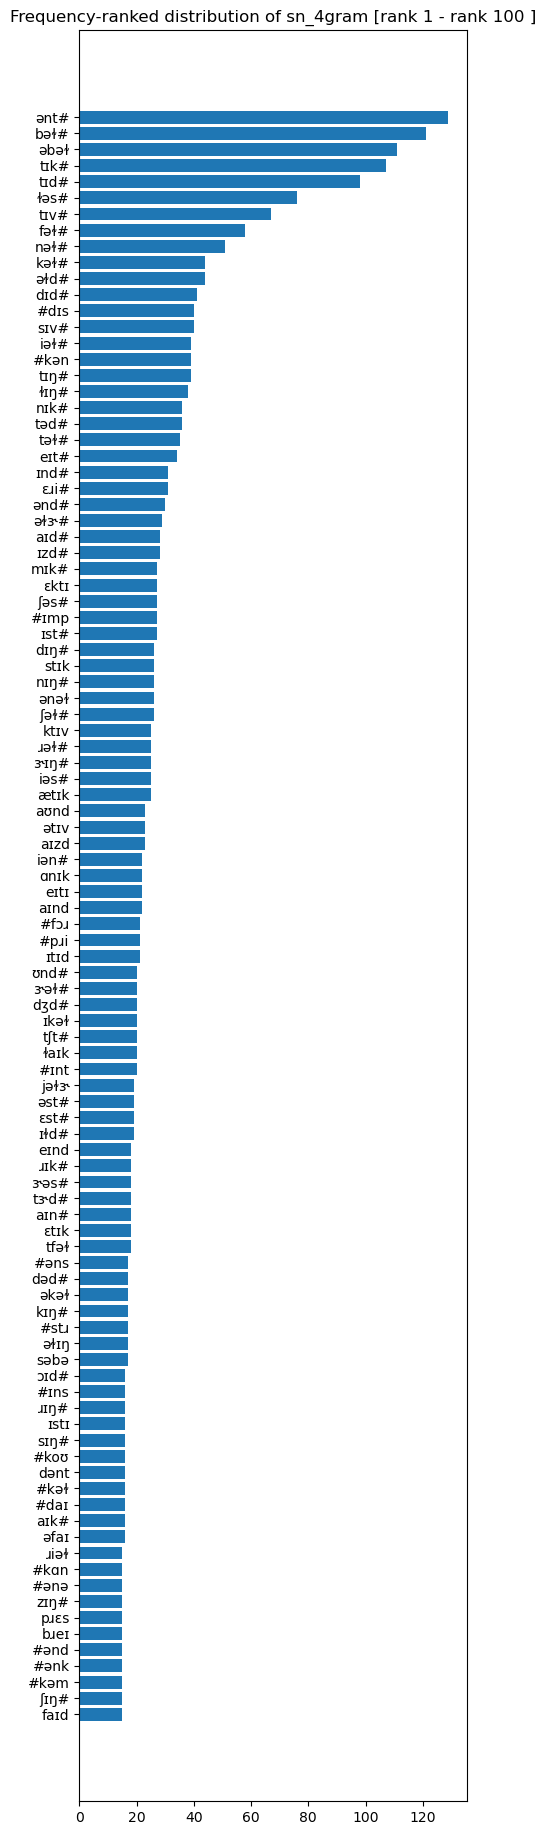

In [322]:
## frequency-ranked view
skippy = False
prefix = "sn_"
n_local = 4
#rank_range = (1,100)
#
R = get_terms_by_freq_rank(df, rank_range, prefix = prefix, n_for_ngram = n_local, skippy = skippy, check = False)
#
show_terms_with_ranking(R, rank_range, prefix = prefix, skippy = skippy, n_for_ngram = n_local, check = False)

In [323]:
## sound 5grams
add_ngram_to_df(df, n_for_ngram = 5, skippy = False, prefix = "sn_", inclusive = True, inclusion_degree = inclusion_degree, check = False)

source_var: sn_1gram
target_var: sn_5gram
min_size: 1
supplement_var: sn_4gram
5708    [#væɫə, væɫən, æɫənt, ɫənt#, #væɫ, væɫə, æɫən,...
1054    [#kɫaʊ, kɫaʊd, ɫaʊdɪ, aʊdɪd, ʊdɪd#, #kɫa, kɫaʊ...
2286    [#fɹaɪ, fɹaɪt, ɹaɪtf, aɪtfə, ɪtfəɫ, tfəɫ#, #fɹ...
4469    [#ɹivi, ɹiviɫ, iviɫɪ, viɫɪŋ, iɫɪŋ#, #ɹiv, ɹivi...
2157    [#fədu, fəduʃ, əduʃi, duʃiɛ, uʃiɛɹ, ʃiɛɹi, iɛɹ...
                              ...                        
2154    [#faɪb, faɪbɹ, aɪbɹə, ɪbɹəs, bɹəs#, #faɪ, faɪb...
219     [#ɔɫma, ɔɫmaɪ, ɫmaɪt, maɪti, aɪti#, #ɔɫm, ɔɫma...
1546    [#dɪst, dɪstɹ, ɪstɹɔ, stɹɔɪ, tɹɔɪd, ɹɔɪd#, #dɪ...
3541    [#næʃə, næʃən, æʃənə, ʃənəɫ, ənəɫ#, #næʃ, næʃə...
4031    [#pɔɪn, pɔɪnt, ɔɪntɫ, ɪntɫə, ntɫəs, tɫəs#, #pɔ...
Name: sn_5gram, Length: 3775, dtype: object


/var/folders/s2/lk8hdt6j10j0xyycw1lbjsm40000gn/T/ipykernel_78267/3047574178.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx[target_var] = ngrams


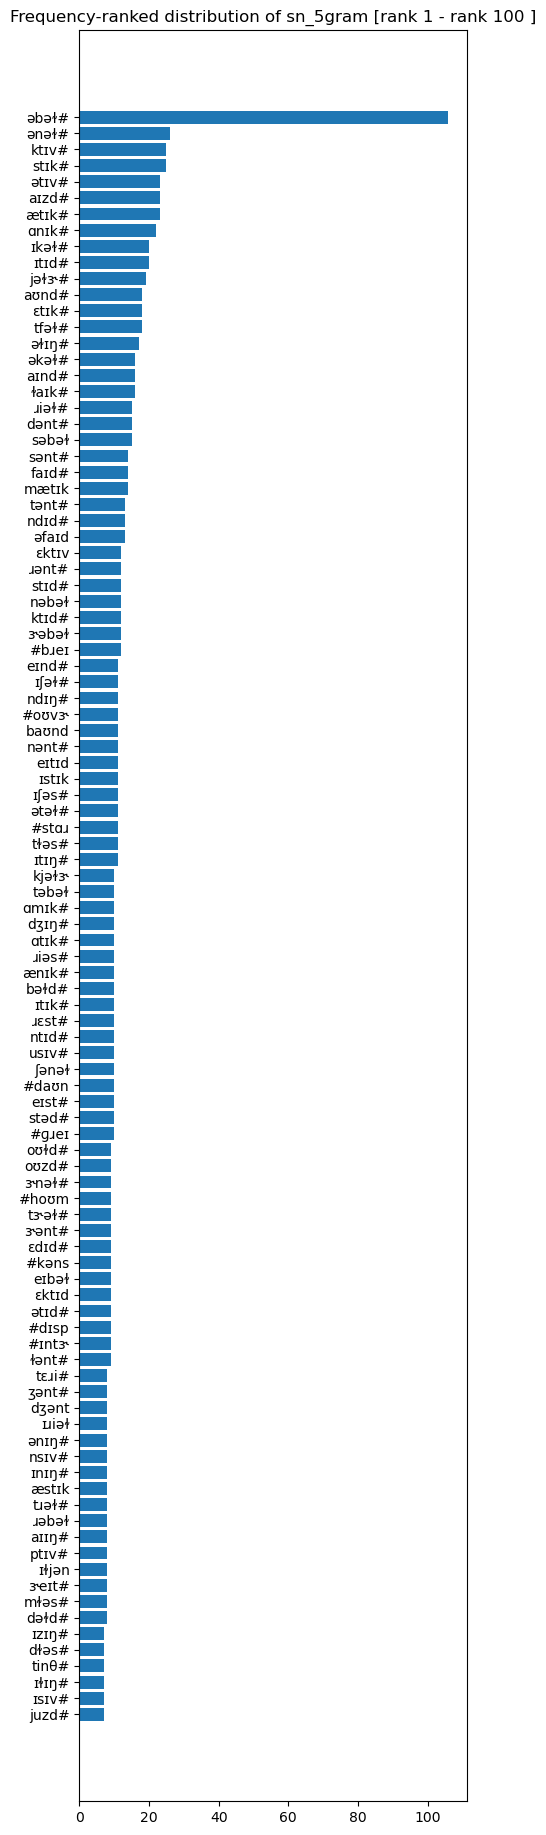

In [324]:
## frequency-ranked view
skippy = False
prefix = "sn_"
n_local = 5
#rank_range = (1,100)
#
R = get_terms_by_freq_rank(df, rank_range, prefix = prefix, n_for_ngram = n_local, skippy = skippy, check = False)
#
show_terms_with_ranking(R, rank_range, prefix = prefix, skippy = skippy, n_for_ngram = n_local, check = False)

In [325]:
## sound skippy 2grams
add_ngram_to_df(df, n_for_ngram = 2, skippy = True, prefix = "sn_", inclusive = True, inclusion_degree = inclusion_degree, check = False)

source_var: sn_1gram
target_var: sn_skippy2gram
min_size: 1
supplement_var: sn_1gram
5708    [#v, #…æ, #…ɫ, #…ə, #…n, #…t, #…#, væ, v…ɫ, v…...
1054    [#k, #…ɫ, #…a, #…ʊ, #…d, #…ɪ, #…d, #…#, kɫ, k…...
2286    [#f, #…ɹ, #…a, #…ɪ, #…t, #…f, #…ə, #…ɫ, #…#, f...
4469    [#ɹ, #…i, #…v, #…i, #…ɫ, #…ɪ, #…ŋ, #…#, ɹi, ɹ…...
2157    [#f, #…ə, #…d, #…u, #…ʃ, #…i, #…ɛ, #…ɹ, #…i, #...
                              ...                        
2154    [#f, #…a, #…ɪ, #…b, #…ɹ, #…ə, #…s, #…#, fa, f…...
219     [#ɔ, #…ɫ, #…m, #…a, #…ɪ, #…t, #…i, #…#, ɔɫ, ɔ…...
1546    [#d, #…ɪ, #…s, #…t, #…ɹ, #…ɔ, #…ɪ, #…d, #…#, d...
3541    [#n, #…æ, #…ʃ, #…ə, #…n, #…ə, #…ɫ, #…#, næ, n…...
4031    [#p, #…ɔ, #…ɪ, #…n, #…t, #…ɫ, #…ə, #…s, #…#, p...
Name: sn_skippy2gram, Length: 3775, dtype: object


/var/folders/s2/lk8hdt6j10j0xyycw1lbjsm40000gn/T/ipykernel_78267/3047574178.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx[target_var] = ngrams


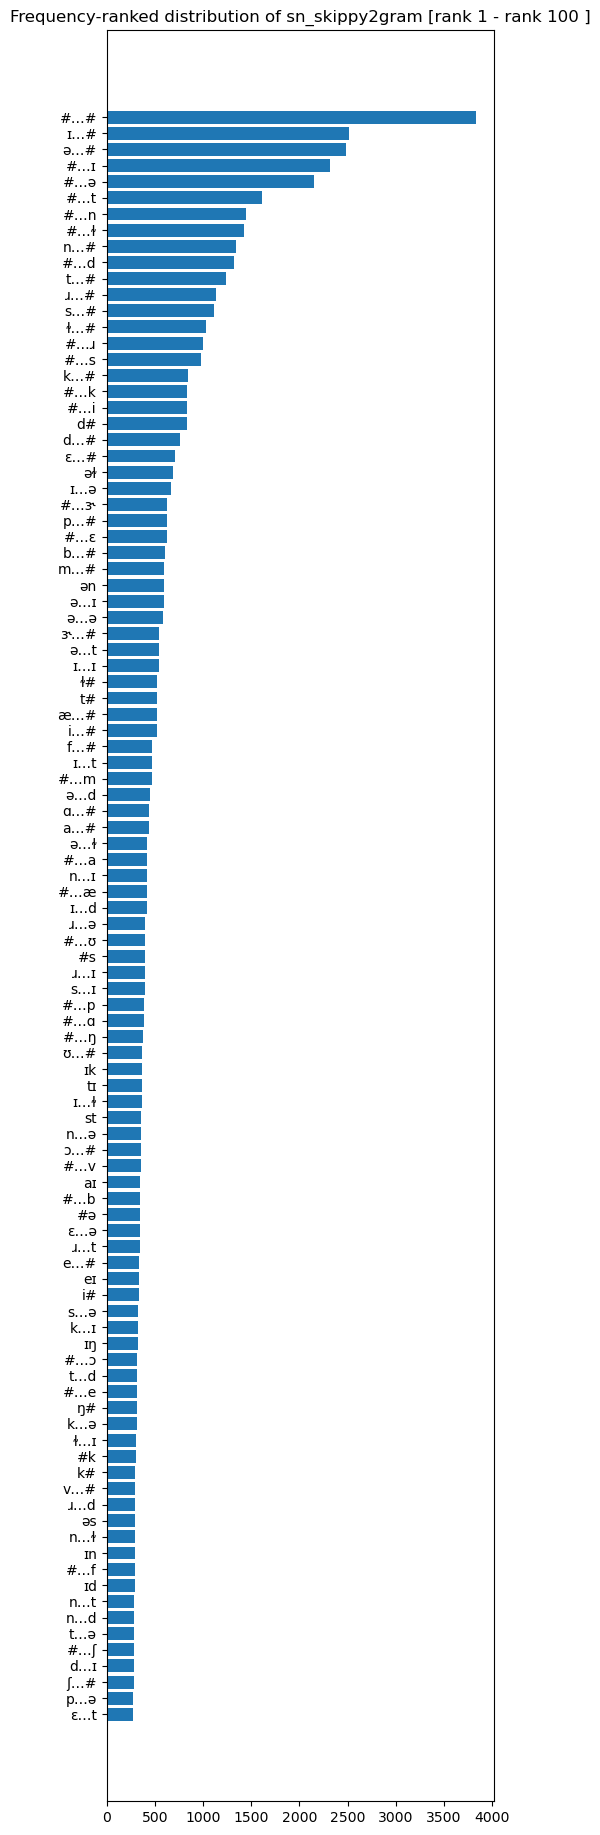

In [326]:
## frequency-ranked view
skippy = True
prefix = "sn_"
n_local = 2
#rank_range = (1,100)
#
R = get_terms_by_freq_rank(df, rank_range, prefix = prefix, n_for_ngram = n_local, skippy = skippy, check = False)
#
show_terms_with_ranking(R, rank_range, prefix = prefix, skippy = skippy, n_for_ngram = n_local, check = False)

In [327]:
## sound skippy 3grams
add_ngram_to_df(df, n_for_ngram = 3, skippy = True, prefix = "sn_", inclusive = True, inclusion_degree = inclusion_degree, check = False)

source_var: sn_1gram
target_var: sn_skippy3gram
min_size: 1
supplement_var: sn_skippy2gram
5708    [#væ, #v…ɫ, #v…ə, #v…n, #v…t, #v…#, #…æɫ, #…æ…...
1054    [#kɫ, #k…a, #k…ʊ, #k…d, #k…ɪ, #k…d, #k…#, #…ɫa...
2286    [#fɹ, #f…a, #f…ɪ, #f…t, #f…f, #f…ə, #f…ɫ, #f…#...
4469    [#ɹi, #ɹ…v, #ɹ…i, #ɹ…ɫ, #ɹ…ɪ, #ɹ…ŋ, #ɹ…#, #…iv...
2157    [#fə, #f…d, #f…u, #f…ʃ, #f…i, #f…ɛ, #f…ɹ, #f…i...
                              ...                        
2154    [#fa, #f…ɪ, #f…b, #f…ɹ, #f…ə, #f…s, #f…#, #…aɪ...
219     [#ɔɫ, #ɔ…m, #ɔ…a, #ɔ…ɪ, #ɔ…t, #ɔ…i, #ɔ…#, #…ɫm...
1546    [#dɪ, #d…s, #d…t, #d…ɹ, #d…ɔ, #d…ɪ, #d…d, #d…#...
3541    [#næ, #n…ʃ, #n…ə, #n…n, #n…ə, #n…ɫ, #n…#, #…æʃ...
4031    [#pɔ, #p…ɪ, #p…n, #p…t, #p…ɫ, #p…ə, #p…s, #p…#...
Name: sn_skippy3gram, Length: 3775, dtype: object


/var/folders/s2/lk8hdt6j10j0xyycw1lbjsm40000gn/T/ipykernel_78267/3047574178.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx[target_var] = ngrams


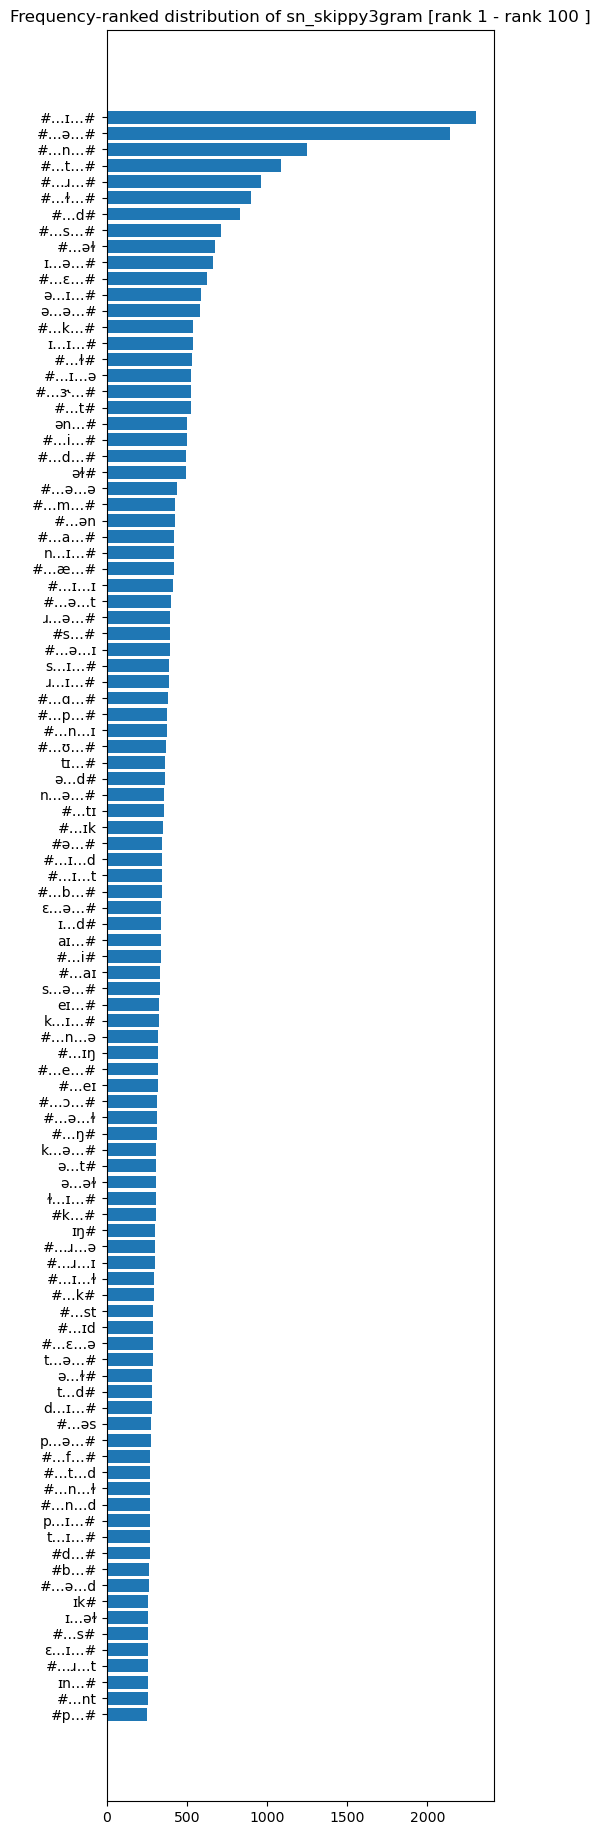

In [328]:
## frequency-ranked view
skippy = True
prefix = "sn_"
n_local = 3
#rank_range = (1,100)
#
R = get_terms_by_freq_rank(df, rank_range, prefix = prefix, n_for_ngram = n_local, skippy = skippy, check = False)
#
show_terms_with_ranking(R, rank_range, prefix = prefix, skippy = skippy, n_for_ngram = n_local, check = False)

In [329]:
## sound skippy 4grams
add_ngram_to_df(df, n_for_ngram = 4, prefix = "sn_", skippy = True, inclusive = True, inclusion_degree = inclusion_degree, check = False)

source_var: sn_1gram
target_var: sn_skippy4gram
min_size: 1
supplement_var: sn_skippy3gram
5708    [#væɫ, #væ…ə, #væ…n, #væ…t, #væ…#, #v…ɫə, #v…ɫ...
1054    [#kɫa, #kɫ…ʊ, #kɫ…d, #kɫ…ɪ, #kɫ…d, #kɫ…#, #k…a...
2286    [#fɹa, #fɹ…ɪ, #fɹ…t, #fɹ…f, #fɹ…ə, #fɹ…ɫ, #fɹ…...
4469    [#ɹiv, #ɹi…i, #ɹi…ɫ, #ɹi…ɪ, #ɹi…ŋ, #ɹi…#, #ɹ…v...
2157    [#fəd, #fə…u, #fə…ʃ, #fə…i, #fə…ɛ, #fə…ɹ, #fə…...
                              ...                        
2154    [#faɪ, #fa…b, #fa…ɹ, #fa…ə, #fa…s, #fa…#, #f…ɪ...
219     [#ɔɫm, #ɔɫ…a, #ɔɫ…ɪ, #ɔɫ…t, #ɔɫ…i, #ɔɫ…#, #ɔ…m...
1546    [#dɪs, #dɪ…t, #dɪ…ɹ, #dɪ…ɔ, #dɪ…ɪ, #dɪ…d, #dɪ…...
3541    [#næʃ, #næ…ə, #næ…n, #næ…ə, #næ…ɫ, #næ…#, #n…ʃ...
4031    [#pɔɪ, #pɔ…n, #pɔ…t, #pɔ…ɫ, #pɔ…ə, #pɔ…s, #pɔ…...
Name: sn_skippy4gram, Length: 3775, dtype: object


/var/folders/s2/lk8hdt6j10j0xyycw1lbjsm40000gn/T/ipykernel_78267/3047574178.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx[target_var] = ngrams


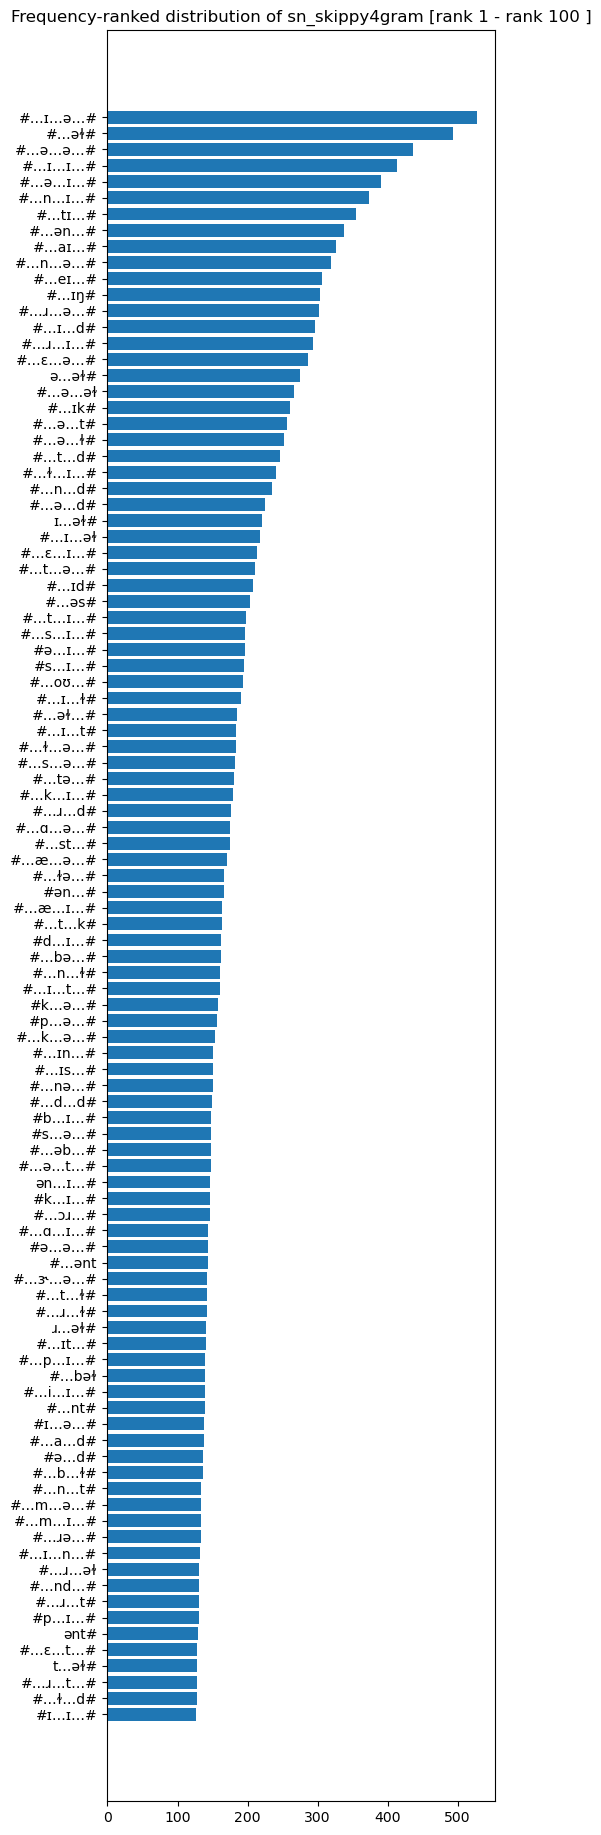

In [330]:
## frequency-ranked view
skippy = True
prefix = "sn_"
n_local = 4
#rank_range = (1,100)
#
R = get_terms_by_freq_rank(df, rank_range, prefix = prefix, n_for_ngram = n_local, skippy = skippy, check = False)
#
show_terms_with_ranking(R, rank_range, prefix = prefix, skippy = skippy, n_for_ngram = n_local, check = False)

In [331]:
## sound skippy 5grams
add_ngram_to_df(df, n_for_ngram = 5, skippy = True, prefix = "sn_", inclusive = True, inclusion_degree = inclusion_degree, check = False)

source_var: sn_1gram
target_var: sn_skippy5gram
min_size: 1
supplement_var: sn_skippy4gram
5708    [#væɫə, #væɫ…n, #væɫ…t, #væɫ…#, #væ…ən, #væ…ə…...
1054    [#kɫaʊ, #kɫa…d, #kɫa…ɪ, #kɫa…d, #kɫa…#, #kɫ…ʊd...
2286    [#fɹaɪ, #fɹa…t, #fɹa…f, #fɹa…ə, #fɹa…ɫ, #fɹa…#...
4469    [#ɹivi, #ɹiv…ɫ, #ɹiv…ɪ, #ɹiv…ŋ, #ɹiv…#, #ɹi…iɫ...
2157    [#fədu, #fəd…ʃ, #fəd…i, #fəd…ɛ, #fəd…ɹ, #fəd…i...
                              ...                        
2154    [#faɪb, #faɪ…ɹ, #faɪ…ə, #faɪ…s, #faɪ…#, #fa…bɹ...
219     [#ɔɫma, #ɔɫm…ɪ, #ɔɫm…t, #ɔɫm…i, #ɔɫm…#, #ɔɫ…aɪ...
1546    [#dɪst, #dɪs…ɹ, #dɪs…ɔ, #dɪs…ɪ, #dɪs…d, #dɪs…#...
3541    [#næʃə, #næʃ…n, #næʃ…ə, #næʃ…ɫ, #næʃ…#, #næ…ən...
4031    [#pɔɪn, #pɔɪ…t, #pɔɪ…ɫ, #pɔɪ…ə, #pɔɪ…s, #pɔɪ…#...
Name: sn_skippy5gram, Length: 3775, dtype: object


/var/folders/s2/lk8hdt6j10j0xyycw1lbjsm40000gn/T/ipykernel_78267/3047574178.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx[target_var] = ngrams


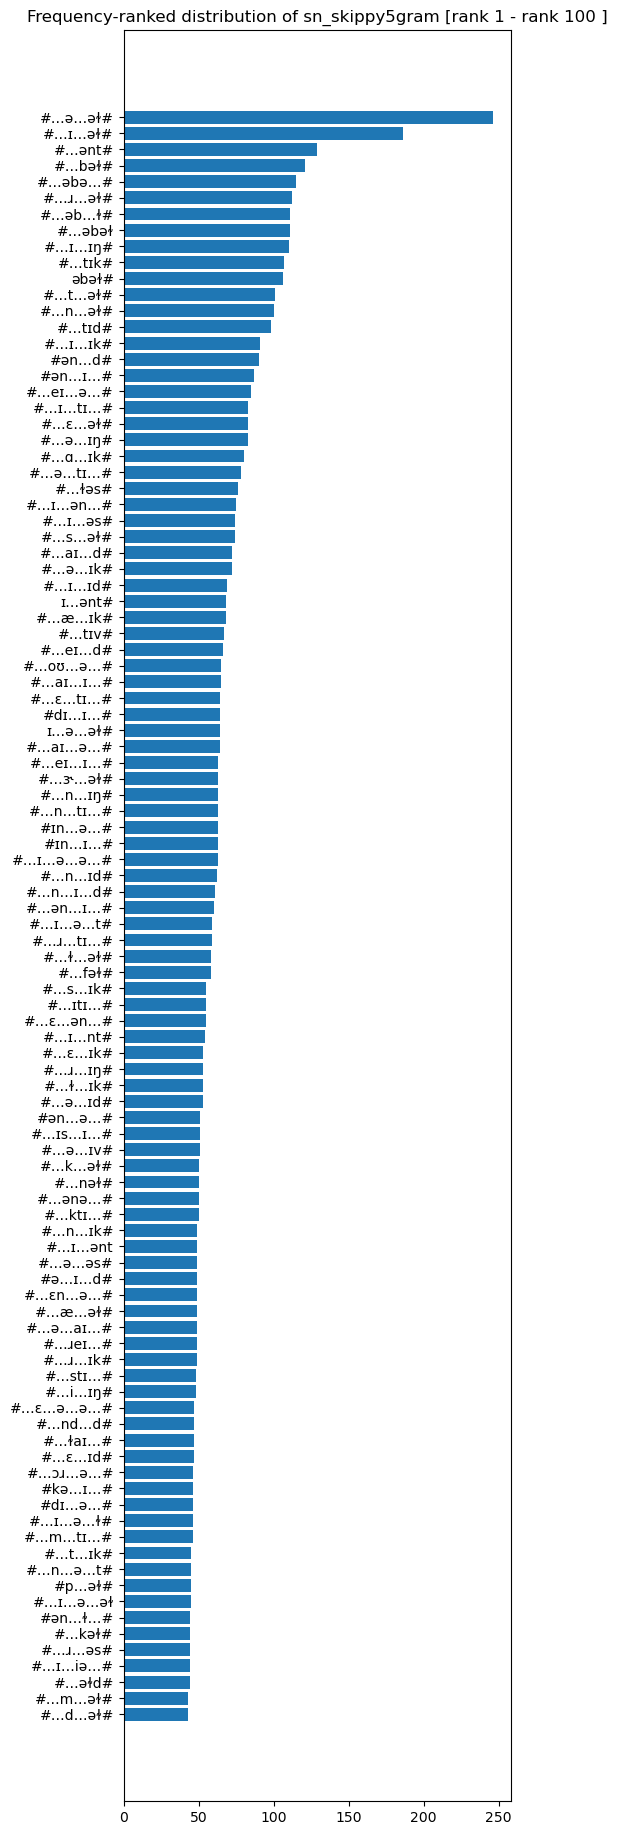

In [332]:
## frequency-ranked view
skippy = True
prefix = "sn_"
n_local = 5
#rank_range = (1,100)
#
R = get_terms_by_freq_rank(df, rank_range, prefix = prefix, n_for_ngram = n_local, skippy = skippy, check = False)
#
show_terms_with_ranking(R, rank_range, prefix = prefix, skippy = skippy, n_for_ngram = n_local, check = False)